In [22]:
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import InceptionV3
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam


In [23]:
df = pd.read_csv('list_attribute.txt', delim_whitespace=True, index_col=0)
image_files = os.listdir('images/')
filtered_df = df[df.index.isin(image_files)]
filtered_df

/tmp/ipykernel_20194/2986566526.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('list_attribute.txt', delim_whitespace=True, index_col=0)


,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000051.jpg,1,-1,-1,1,1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
000052.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
000065.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
000166.jpg,1,-1,-1,-1,-1,-1,-1,1,-1,-1,...,1,-1,-1,-1,-1,1,-1,-1,-1,-1
000198.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202320.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,1,-1,-1,1,-1,-1,1
202340.jpg,-1,-1,1,-1,-1,-1,-1,-1,1,-1,...,-1,1,1,-1,-1,-1,1,-1,-1,1
202347.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1
202357.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,-1,1


In [24]:
filtered_df.columns

Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object')

In [25]:
filtered_df.reset_index(inplace=True)

In [26]:
compiled_df = filtered_df[['index', 'Male']]
compiled_df

,index,Male
0,000051.jpg,1
1,000052.jpg,1
2,000065.jpg,1
3,000166.jpg,1
4,000198.jpg,-1
...,...,...
4995,202320.jpg,-1
4996,202340.jpg,-1
4997,202347.jpg,-1
4998,202357.jpg,-1


In [27]:
train_files = os.listdir('train/')
validator_files = os.listdir('test/')
train_df = compiled_df[compiled_df['index'].isin(train_files)]
validator_df = compiled_df[compiled_df['index'].isin(validator_files)]

train_df.head()

,index,Male
0,000051.jpg,1
1,000052.jpg,1
2,000065.jpg,1
4,000198.jpg,-1
5,000201.jpg,-1


In [28]:
validator_df.head()

,index,Male
3,000166.jpg,1
8,000352.jpg,1
10,000414.jpg,1
18,000608.jpg,1
22,000798.jpg,1


In [29]:
train_df.loc[:, ('Male')] = train_df['Male'].astype('string')
validator_df.loc[:, ('Male')] = validator_df['Male'].astype('string')

train_df.head(), validator_df.head()

/tmp/ipykernel_20194/1230635900.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<StringArray>
[ '1',  '1',  '1', '-1', '-1', '-1',  '1',  '1',  '1',  '1',
 ...
 '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1',  '1']
Length: 3500, dtype: string' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_df.loc[:, ('Male')] = train_df['Male'].astype('string')
/tmp/ipykernel_20194/1230635900.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<StringArray>
[ '1',  '1',  '1',  '1',  '1',  '1', '-1',  '1', '-1',  '1',
 ...
 '-1', '-1', '-1', '-1', '-1', '-1',  '1', '-1', '-1',  '1']
Length: 1500, dtype: string' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  validator_df.loc[:, ('Male')] = validator_df['Male'].astype('string')


(        index Male
 0  000051.jpg    1
 1  000052.jpg    1
 2  000065.jpg    1
 4  000198.jpg   -1
 5  000201.jpg   -1,
          index Male
 3   000166.jpg    1
 8   000352.jpg    1
 10  000414.jpg    1
 18  000608.jpg    1
 22  000798.jpg    1)

In [30]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, zoom_range=0.2, rotation_range=0.2)

train_generator_df = datagen.flow_from_dataframe(
 dataframe=train_df,
 directory='train/',
 x_col='index',
 y_col='Male',
 subset='training',
 batch_size=32,
 seed=999,
 shuffle=True,
 class_mode='binary',
 target_size=(128, 128)
)

validator_generator_df = datagen.flow_from_dataframe(
 dataframe=validator_df,
 directory='test/',
 x_col='index',
 y_col='Male',
 subset='validation',
 batch_size=32,
 seed=999,
 shuffle=True,
 class_mode='binary',
 target_size=(128, 128)
)

Found 2800 validated image filenames belonging to 2 classes.
Found 300 validated image filenames belonging to 2 classes.


In [31]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

2024-03-11 23:43:08.519613: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-11 23:43:08.543265: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-11 23:43:08.543514: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-11 23:43:08.545318: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-11 23:43:08.545592: I external/local_xla/xla/stream_executor

In [32]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# optimizer = Adam(learning_rate=0.999)  # Adjust learning rate as needed

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(
 train_generator_df,
 epochs=30,
 validation_data=validator_generator_df
)

Epoch 1/30


2024-03-11 23:43:27.812443: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-03-11 23:43:33.393145: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f5d1844efb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-11 23:43:33.393190: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050, Compute Capability 8.6
2024-03-11 23:43:33.400493: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1710175413.470880   25128 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


88/88 [==============================] - 67s 312ms/step - loss: 0.3212 - accuracy: 0.8679 - val_loss: 59.1336 - val_accuracy: 0.6200
Epoch 2/30
88/88 [==============================] - 8s 85ms/step - loss: 0.1391 - accuracy: 0.9357 - val_loss: 1.2919 - val_accuracy: 0.8133
Epoch 3/30
88/88 [==============================] - 8s 85ms/step - loss: 0.0881 - accuracy: 0.9664 - val_loss: 0.2090 - val_accuracy: 0.9400
Epoch 4/30
88/88 [==============================] - 7s 84ms/step - loss: 0.1103 - accuracy: 0.9586 - val_loss: 6.9587 - val_accuracy: 0.8900
Epoch 5/30
88/88 [==============================] - 8s 85ms/step - loss: 0.0690 - accuracy: 0.9739 - val_loss: 0.2216 - val_accuracy: 0.9267
Epoch 6/30
88/88 [==============================] - 7s 83ms/step - loss: 0.0615 - accuracy: 0.9779 - val_loss: 0.1539 - val_accuracy: 0.9367
Epoch 7/30
88/88 [==============================] - 8s 85ms/step - loss: 0.0650 - accuracy: 0.9768 - val_loss: 0.2858 - val_accuracy: 0.8767
Epoch 8/30
88/88 [===

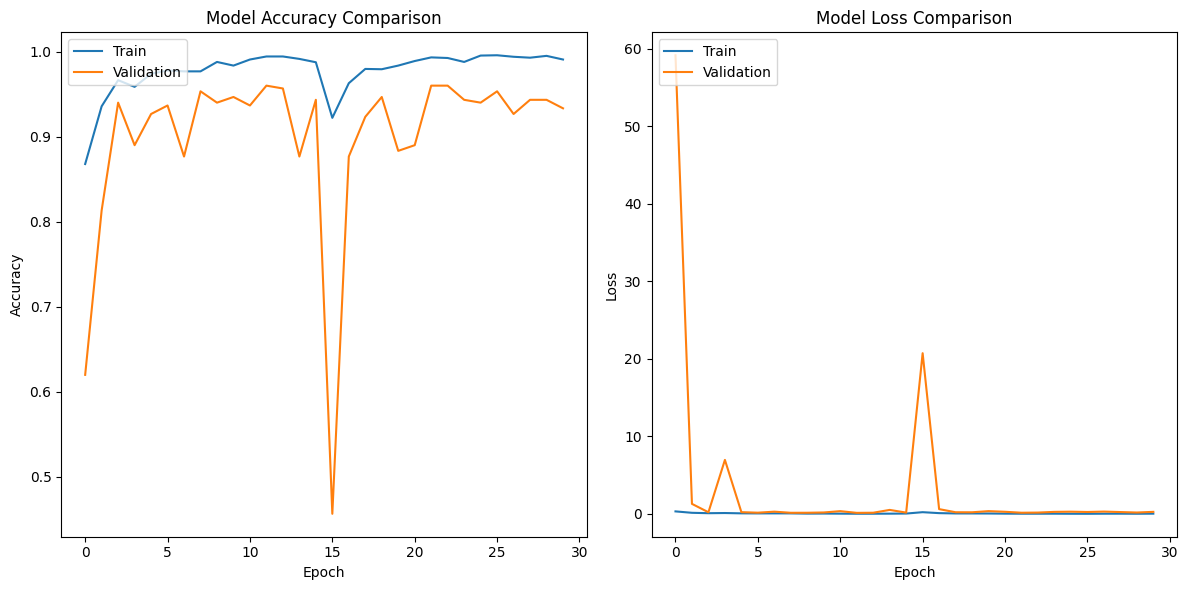

In [33]:
plt.figure(figsize=(12, 6))
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
# Show plots
plt.tight_layout()
plt.show()

In [34]:
# Evaluate the model on the validation set
evaluation = model.evaluate(validator_generator_df)
# Print the evaluation results
print(f"Validation Loss: {evaluation[0]}")
print(f"Validation Accuracy: {evaluation[1]}")

10/10 [==============================] - 1s 61ms/step - loss: 0.2676 - accuracy: 0.9400
Validation Loss: 0.2675774395465851
Validation Accuracy: 0.9399999976158142


In [35]:
model.save("model_saved/inception-v3-experiment-02.h5")

/home/insomnius/.pyenv/versions/3.11.6/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
